In [1]:
# %config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# from pandas.core.common import SettingWithCopyWarning
%matplotlib inline
warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

D:\miniconda\envs\ml4t\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 3장 - 금융 시계열 시각화
- 천 마디 말보다 한 장의 사진이 가치 있다는 옛 속담은 데이터 과학 분야에 매우 많이 적용됩니다. 
- 다양한 종류의 플롯을 사용하여 데이터를 탐색할 뿐만 아니라 데이터 기반 스토리를 전달할 수도 있습니다. 

- 금융 시계열 데이터로 작업하는 동안 계열을 신속하게 구성하면 이미 다음과 같은 많은 귀중한 통찰력을 얻을 수 있습니다.
    - 계열이 연속적입니까? 
    - 예상치 못한 누락된 값이 있습니까? 
    - 일부 값이 이상치처럼 보입니까? •
    - 추가 분석을 위해 빠르게 확인하고 사용할 수 있는 패턴이 있습니까? 
    
- 모든 프로젝트 초기에 시각화의 주요 목표는 데이터에 익숙해지고 좀 더 자세히 알아가는 것
- 그래야만 시리즈의 미래 가치를 예측하는 것을 목표로 하는 적절한 통계 분석을 수행하고 기계 학습 모델을 구축
- 데이터 시각화와 관련하여 Python은 다양한 수준의 필요한 복잡성(학습 곡선 포함)과 약간 다른 출력 품질을 통해 작업을 완료할 수 있는 다양한 라이브러리를 제공합니다. 시각화에 사용되는 가장 인기 있는 라이브러리는 다음과 같습니다. 

- matplotlib 
- seaborn 
- plotly 
- altair 
- bokeh 
>  언급된 라이브러리를 활용하여 이 장에 표시된 모든 시각화를 만들 수 있습니다.

## 3.1 시계열 데이터의 기본 시각화

In [3]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

### 다운로드 및 단순수익률 계산
> 2020년의 마이크로소프트 주가를 다운로드하고 단순 수익률 계산

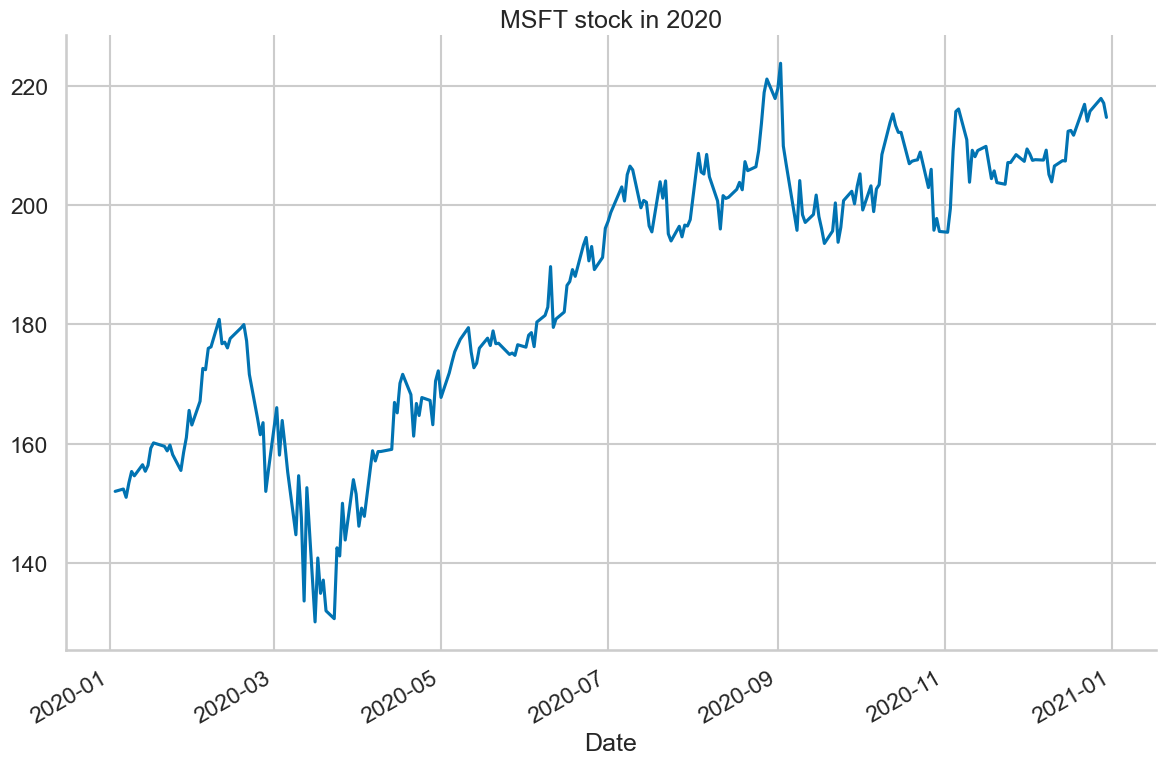

In [4]:
df = yf.download("MSFT",
                 start="2020-01-01", 
                 end="2020-12-31",
                 auto_adjust = False, 
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.dropna()

# 조정종가를 차트로 그리기
df["Adj Close"].plot(title="MSFT stock in 2020");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_1', dpi=200)

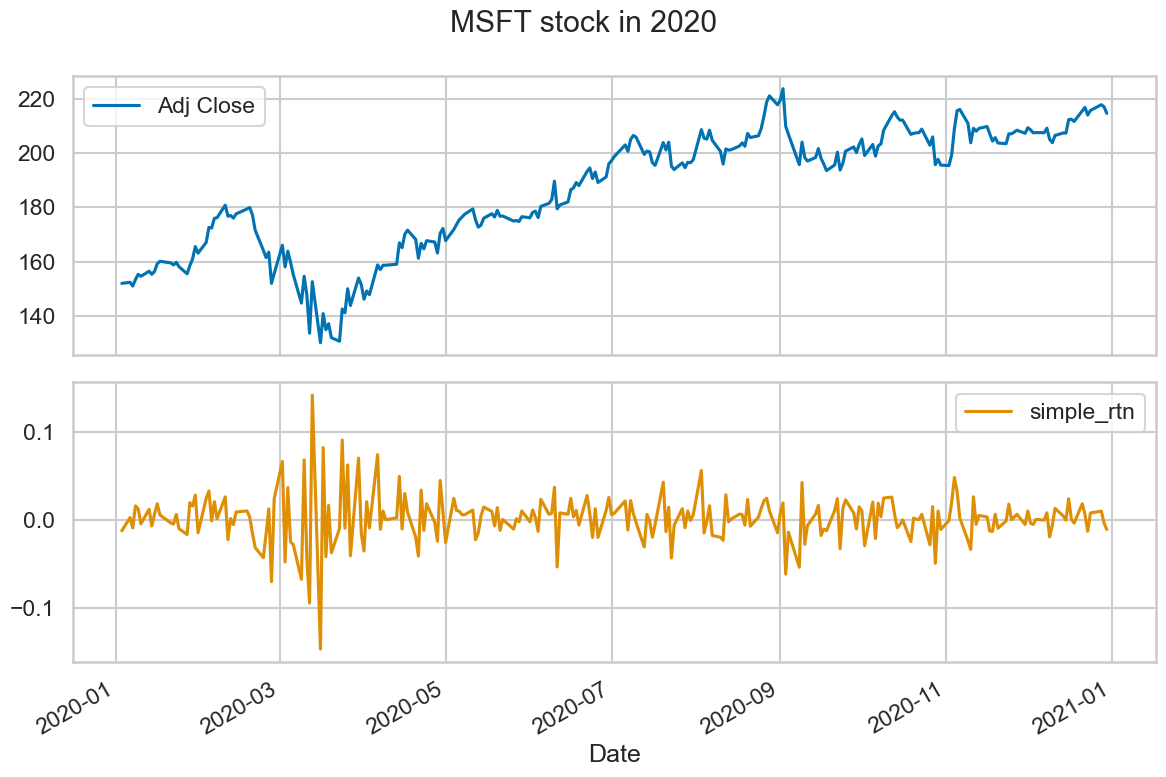

In [5]:
# 조정 종가와 단순 수익률을 하나의 그래프에 플롯
( df[["Adj Close", "simple_rtn"]]
    .plot(subplots=True, #subplots활용
          sharex=True, # x축을 쉐어함
          title="MSFT stock in 2020")
);
plt.tight_layout()
plt.savefig('output/images/figure_3_2', dpi=200)

### multi-plotting
> 가격과 변동률을 함께 그려봅시다

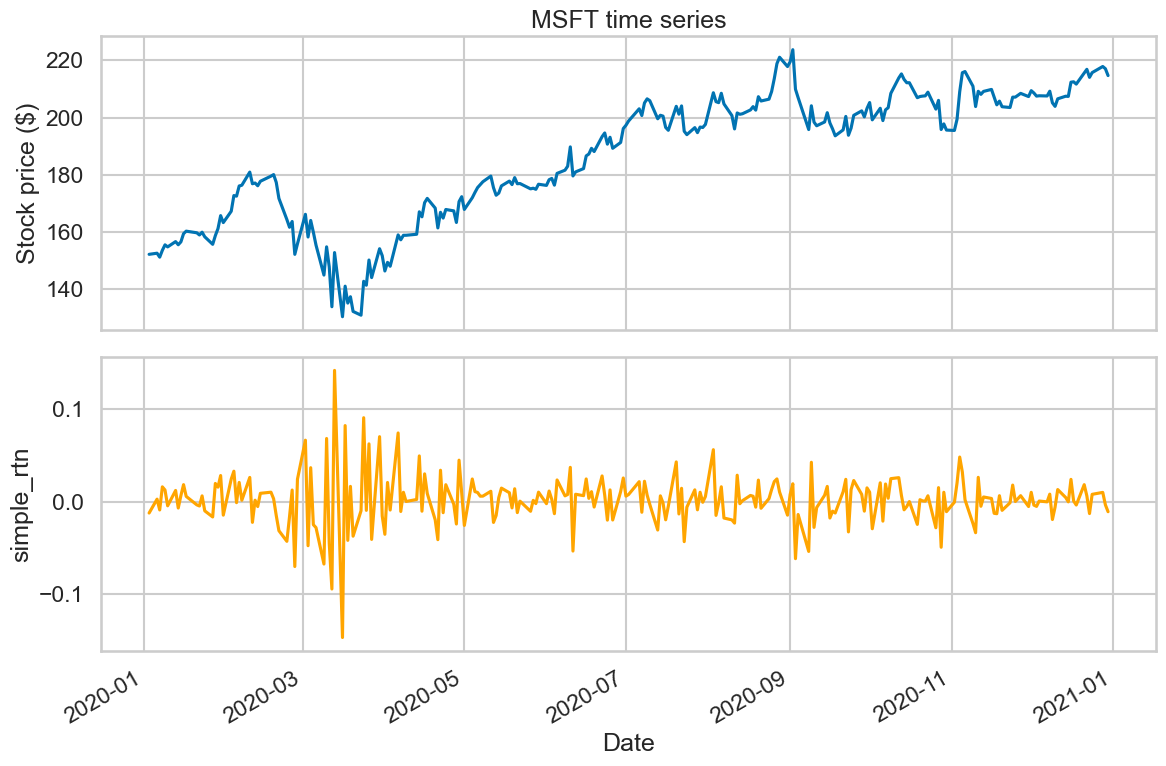

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True) # 2x1의 subplots을 생성

# 가격
df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="MSFT time series",
          ylabel="Stock price ($)")
 
#  변동률 
df["simple_rtn"].plot(ax=ax[1], color='orange')
ax[1].set(ylabel="simple_rtn")

plt.tight_layout()
plt.savefig('output/images/figure_3_3', dpi=200)

> `pandas`의 플로팅 백엔드를 `plotly`로 변경하기
: 동적으로 유저가 확인할 수 있는 plotly 생성

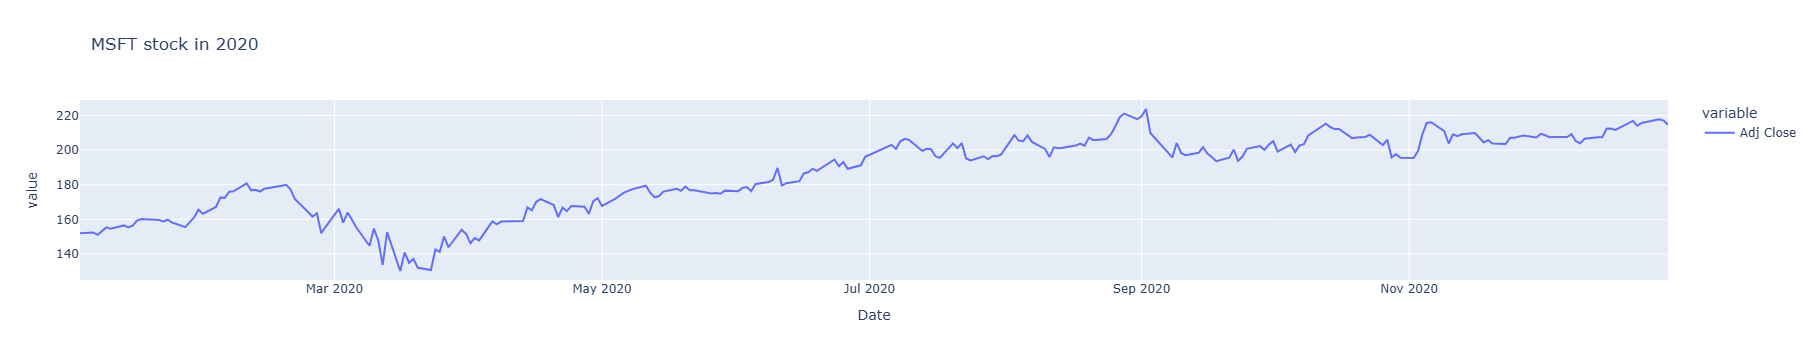

In [7]:
df["Adj Close"].plot(title="MSFT stock in 2020", 
                     backend="plotly")

## 3.2 계절 패턴 시각화

In [36]:
import pandas as pd
import nasdaqdatalink
import seaborn as sns 
import os
from dotenv import load_dotenv
import fredpy as fp
# fp.api_key = 'YOUR_API_KEY'
load_dotenv()
nasdaqdatalink.ApiConfig.api_key = os.getenv("nasdaq_link")
fp.api_key = os.getenv("fred_link")

> Nasdaq 데이터 링크에서 실업 데이터 다운로드 및 표시:

In [37]:
df = (
    nasdaqdatalink.get(dataset="FRED/UNRATENSA", 
                       start_date="2016-01-01", 
                       end_date="2024-08-18")
    .rename(columns={"Value": "unemp_rate"})
)

# df = fp.series('UNRATE',
#               '2024-08-18').data
# df = df["2022-01-01"<=df.date].reset_index(drop=True)
df

unemp_rate
Date                  
2016-01-01         5.3
2016-02-01         5.2
2016-03-01         5.1
2016-04-01         4.7
2016-05-01         4.5
...                ...
2021-09-01         4.6
2021-10-01         4.3
2021-11-01         3.9
2021-12-01         3.7
2022-01-01         4.4

[73 rows x 1 columns]

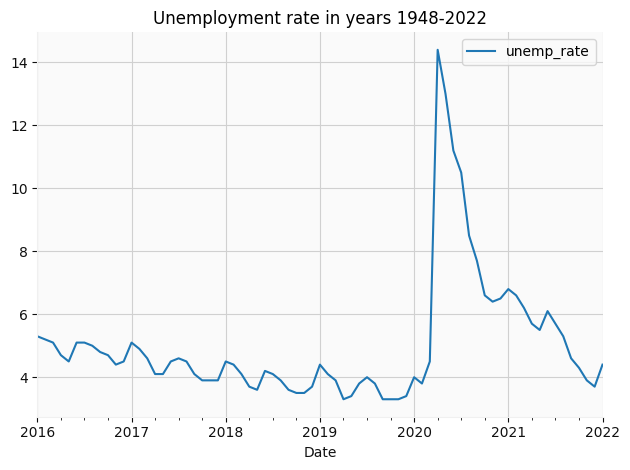

In [38]:
df.plot(title="Unemployment rate in years 1948-2022");
sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_6', dpi=200)

###  계절별 플롯 만들기

>  연도와 월로 새로운 열 만들기: seaborn의 hue활용

In [39]:
df["year"] = df.index.year
df["month"] = df.index.month

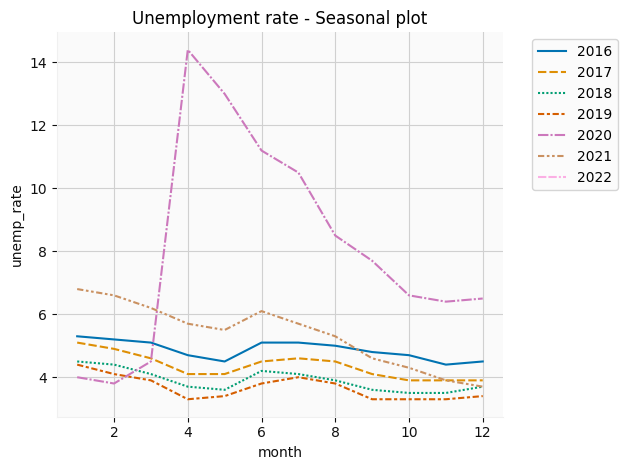

In [40]:
sns.lineplot(data=df, 
             x="month", 
             y="unemp_rate", 
             hue="year",
             style="year", 
             legend="full",
             palette="colorblind")

plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

sns.despine()
plt.tight_layout()
plt.savefig('output/images/figure_3_7', dpi=200)

> 월별 플롯 만들기:

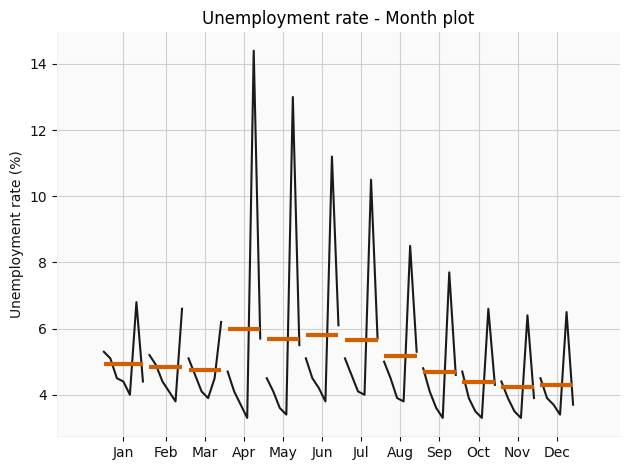

In [41]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px

month_plot(df["unemp_rate"], ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Month plot");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_8', dpi=200)

3. 분기 플롯 만들기:

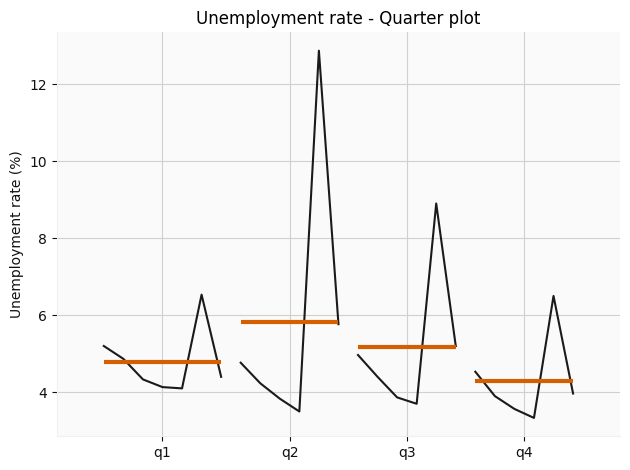

In [42]:
quarter_plot(df["unemp_rate"].resample("Q").mean(), 
             ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Quarter plot");

sns.despine()
plt.tight_layout()
plt.savefig('output/images/figure_3_9', dpi=200)

4. `plotly.express`를 사용하여 극 계절 플롯을 생성합니다:

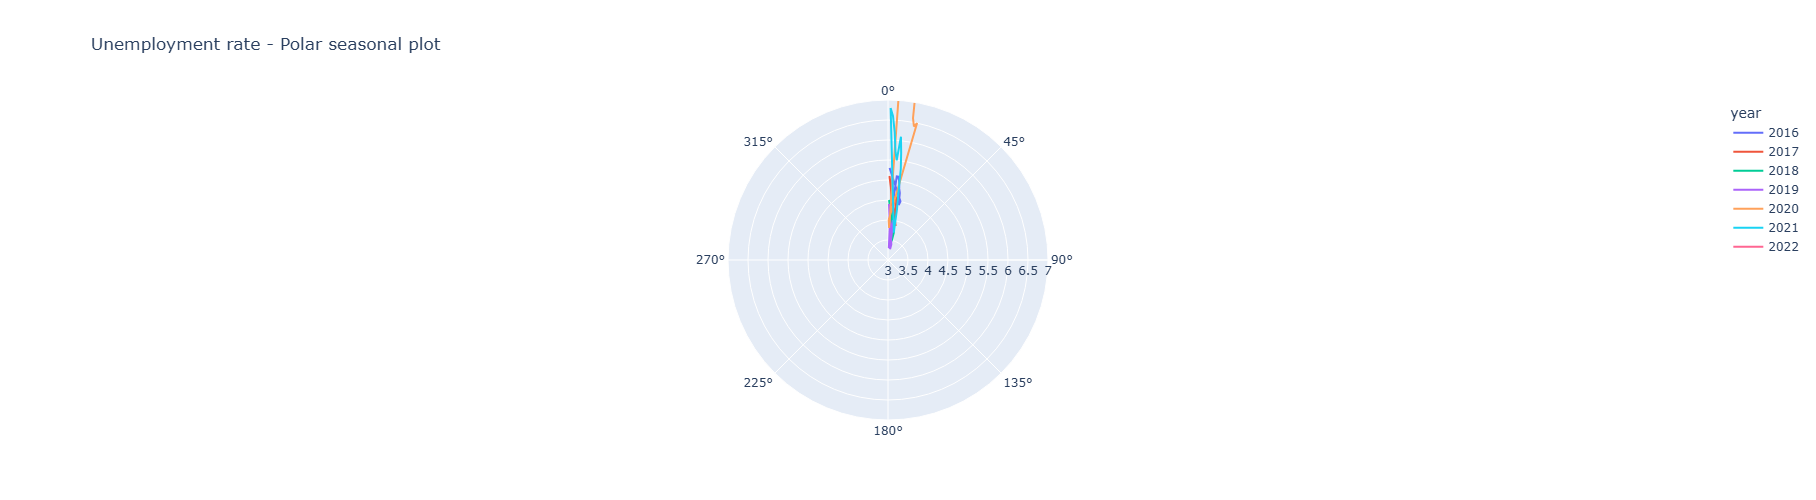

In [44]:
fig = px.line_polar(
    df, r="unemp_rate", theta="month", 
    color="year", line_close=True, 
    title="Unemployment rate - Polar seasonal plot",
    width=600, height=500,
    range_r=[3, 7]
)

fig.show()

## 3.3 인터랙티브 시각화 만들기

1. 라이브러리를 가져오고 노트북 디스플레이를 초기화합니다:

In [16]:
# !pip install pandas-bokeh cufflinks

In [17]:
import pandas as pd 
import yfinance as yf

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh

cf.go_offline()
# initialize notebook display
pandas_bokeh.output_notebook()

Loading BokehJS ...

2. 2020년의 마이크로소프트 주가를 다운로드하고 단순 수익률을 계산하세요.

In [18]:
df = yf.download("MSFT",
                 start="2020-01-01", 
                 end="2020-12-31",
                 auto_adjust = False, 
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.loc[:, ["Adj Close", "simple_rtn"]].dropna()
df = df.dropna()

3. `cufflinks`를 사용하여 플롯을 생성합니다:

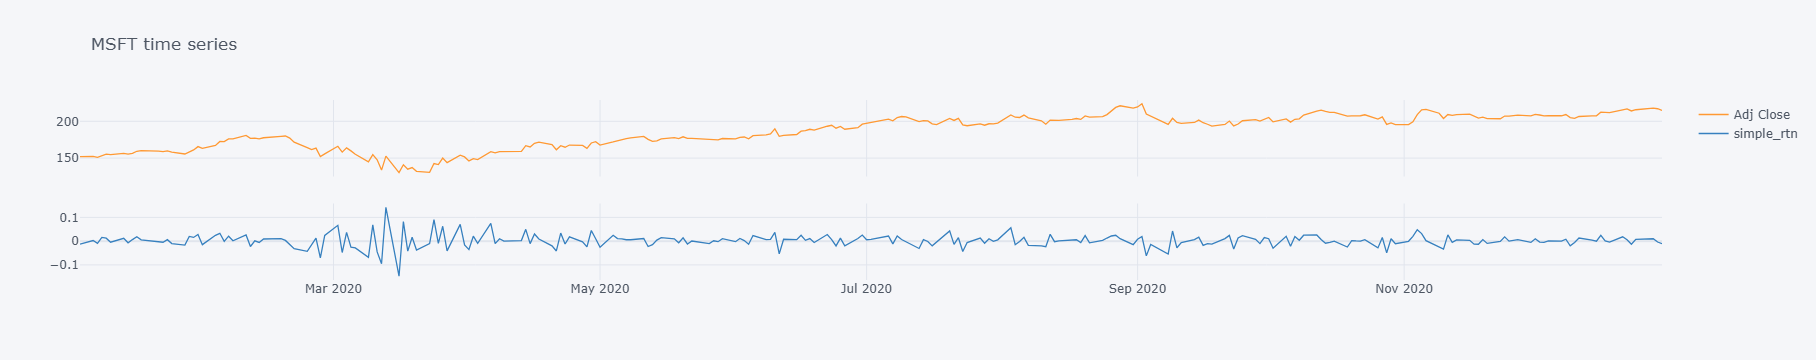

In [19]:
df.iplot(subplots=True, shape=(2,1), 
         shared_xaxes=True, 
         title="MSFT time series")

4. `bokeh`를 사용하여 플롯을 생성합니다:

In [20]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

# output_notebook()
p = figure()
p.title="MSFT time series"
p.line(df["Adj Close"].index,df["Adj Close"])
show(p)

# df["Adj Close"].plot_bokeh(kind="line", 
#                            rangetool=True, 
#                            title="MSFT time series");

5. `plotly.express`를 사용하여 플롯을 생성합니다:

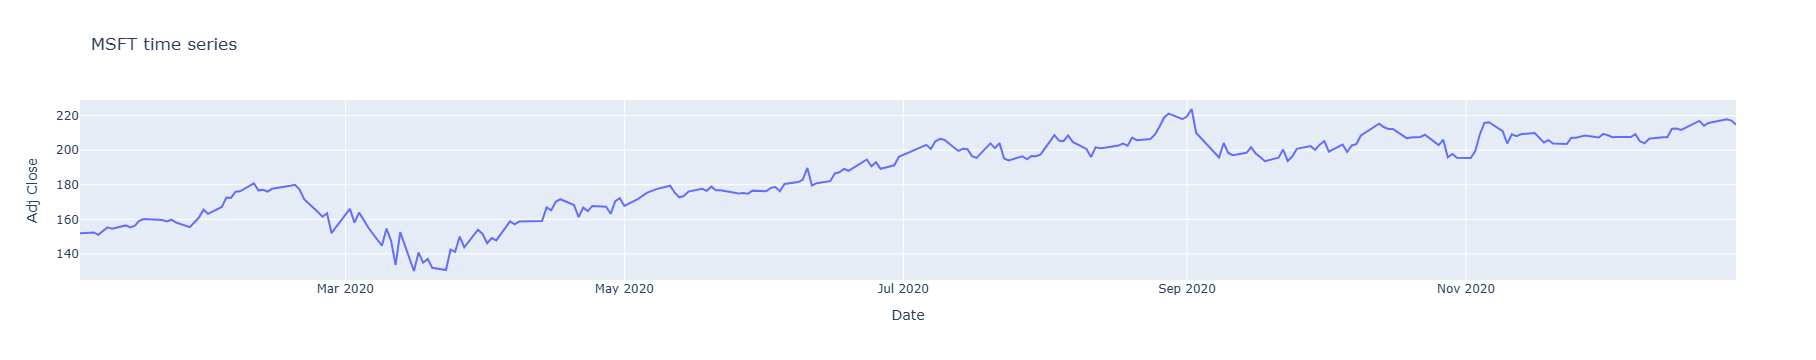

In [21]:
fig = px.line(data_frame=df, 
              y="Adj Close", 
              title="MSFT time series")
fig.show()

`plotly` 플롯에 대한 주석을 정의합니다:

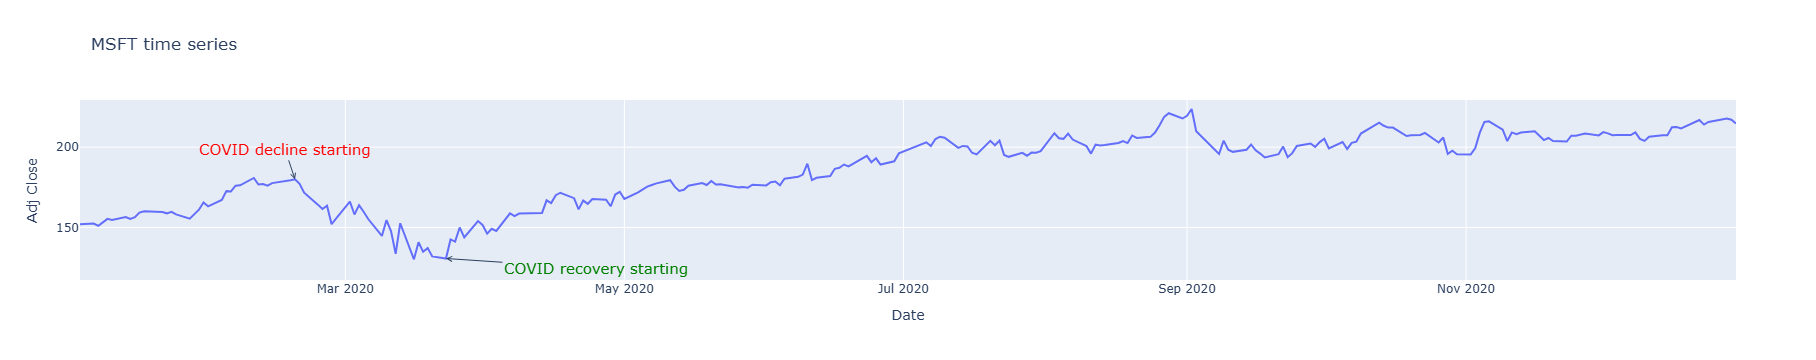

In [22]:
from datetime import date
selected_date_1 = date(2020, 2, 19)
selected_date_2 = date(2020, 3, 23)

selected_y_1 = (
    df
    .query(f"index == '{selected_date_1}'")
    .loc[:, "Adj Close"]
    .squeeze()
)
selected_y_2 = (
    df
    .query(f"index == '{selected_date_2}'")
    .loc[:, "Adj Close"]
    .squeeze()
)

first_annotation = {
    "x": selected_date_1,
    "y": selected_y_1,
    "arrowhead": 5,
    "text": "COVID decline starting",
    "font": {"size": 15, "color": "red"},
}

second_annotation = {
    "x": selected_date_2,
    "y": selected_y_2,
    "arrowhead": 5,
    "text": "COVID recovery starting",
    "font": {"size": 15, "color": "green"},
    "ax": 150,
    "ay": 10
}

fig.update_layout(
    {"annotations": [first_annotation, second_annotation]}
)
fig.show()

## 3.4 캔들스틱 차트 만들기

1. 라이브러리 가져오기:

In [23]:
import pandas as pd 
import yfinance as yf

2. 야후 파이낸스에서 조정된 가격을 다운로드하세요:

In [24]:
df = yf.download("X", 
                 start="2018-01-01", 
                 end="2018-12-31",
                 progress=False,
                 auto_adjust=True)

1. 라이브러리 가져오기:

In [25]:
import cufflinks as cf
from plotly.offline import iplot

cf.go_offline()

`cf.go_offline()`를 매번 실행하는 대신, `cf.set_config_file(offline=True)`를 실행하여 항상 오프라인 모드를 사용하도록 설정을 수정할 수 있습니다. 그런 다음 `cf.get_config_file()`를 사용하여 설정을 확인할 수 있습니다.

In [26]:
cf.set_config_file(offline=False)

In [27]:
cf.get_config_file()

{'sharing': 'public',
 'theme': 'pearl',
 'colorscale': 'dflt',
 'offline': False,
 'offline_connected': True,
 'offline_url': '',
 'offline_show_link': True,
 'offline_link_text': 'Export to plot.ly',
 'datagen_mode': 'stocks',
 'dimensions': None,
 'margin': None,
 'offline_config': None}

2. 트위터의 주가를 사용하여 캔들스틱 차트를 생성하세요.

In [28]:
qf = cf.QuantFig(
    df, title="Twitter's Stock Price", 
    legend="top", name="Twitter's stock prices in 2018"
)

3. 도표에 거래량과 이동 평균을 추가하세요:

In [29]:
qf.add_volume()
qf.add_sma(periods=20, column="Close", color="red")
qf.add_ema(periods=20, color="green") 

4. 플롯을 표시합니다:

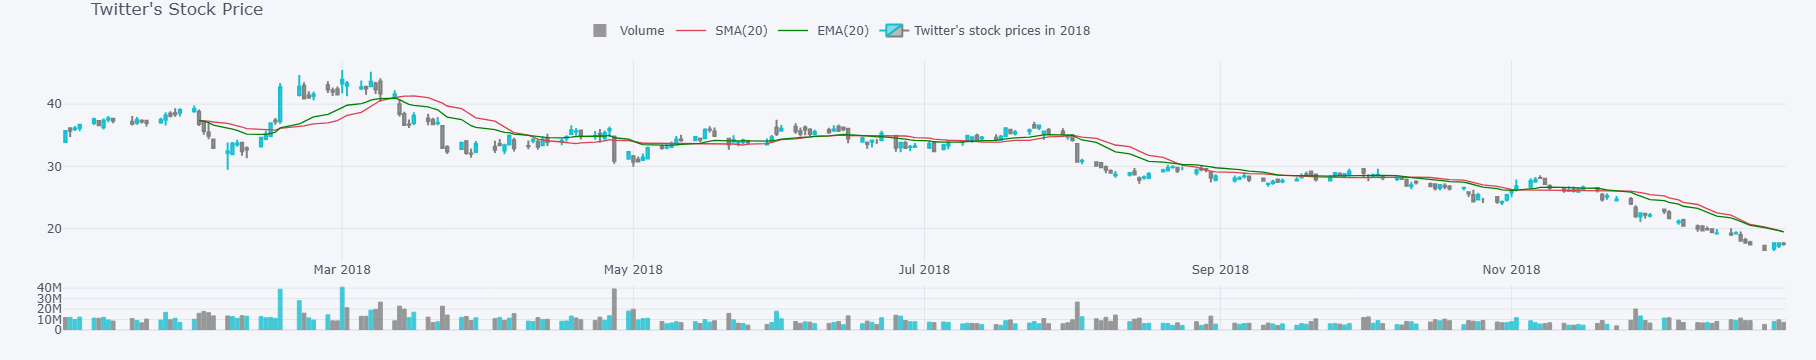

In [30]:
qf.iplot()

1. 라이브러리 가져오기:

In [31]:
# !pip install mplfinance
import plotly.graph_objects as go
import mplfinance as mpf

2. `plotly`를 사용하여 캔들스틱 차트를 생성합니다:

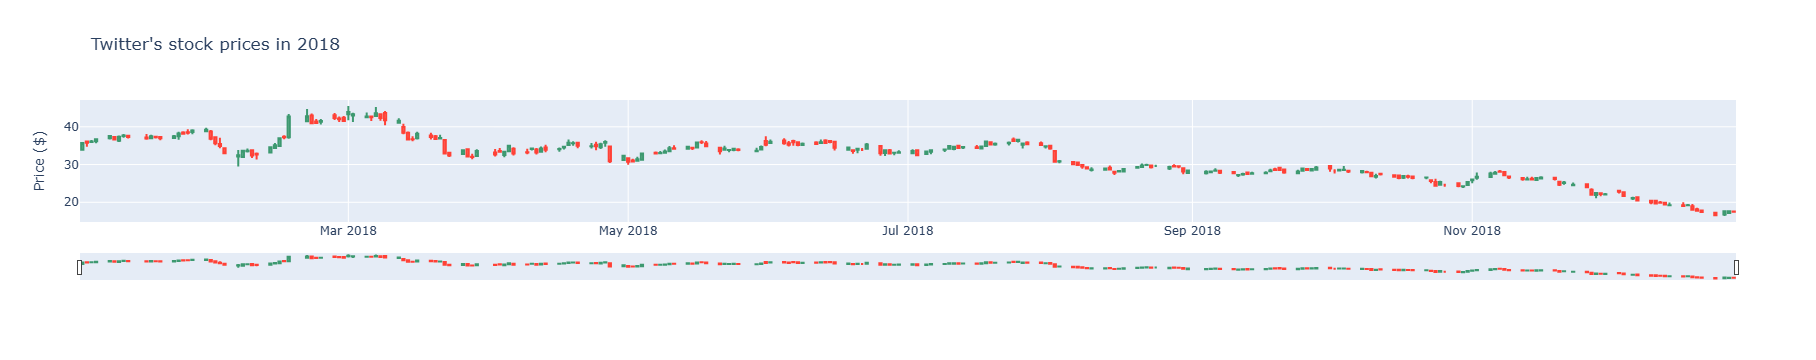

In [32]:
fig = go.Figure(data=
    go.Candlestick(x=df.index,
                   open=df["Open"],
                   high=df["High"],
                   low=df["Low"],
                   close=df["Close"])
)

fig.update_layout(
    title="Twitter's stock prices in 2018",
    yaxis_title="Price ($)"
)

fig.show()

3. `mplfinance`를 사용하여 캔들스틱 차트를 생성합니다:

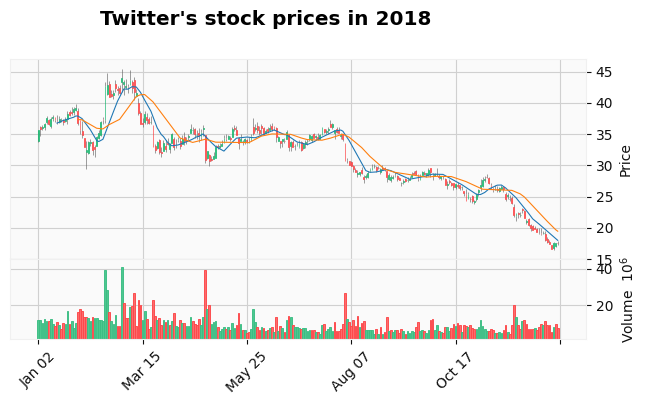

<Figure size 640x480 with 0 Axes>

In [33]:
mpf.plot(df, type="candle", 
         mav=(10, 20), 
         volume=True, 
         style="yahoo", 
         title="Twitter's stock prices in 2018", 
         figsize=(8, 4));

sns.despine()
plt.tight_layout()